🟦 Cell 1 — Title + Setup

In [41]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

REPO = r"D:\MedVLMBench"
DATA_DIR = os.path.join(REPO, "phase1", "data", "chestxray_iu")
IMG_DIR = os.path.join(DATA_DIR, "images", "images_normalized")

SUBSET_PATH = os.path.join(REPO, "EDA", "eda_reports", "sanity_subset_iucxr_v02.csv")
OUT_DIR = os.path.join(REPO, "EDA", "eda_panels")
os.makedirs(OUT_DIR, exist_ok=True)

🟦 CELL 2 — Load Subset + Preview

In [42]:
df = pd.read_csv(SUBSET_PATH)
print(df.shape)
df.head()

(53, 14)


,UID,Image_ID,View,MeSH,Problems,image,indication,comparison,findings,impression,caption,Pathology_Labels_14,report_word_count,report_sentence_count
0,206,206_IM-0697-6001.dcm.png,Frontal,Density/lung/lingula;Cardiomegaly/borderline;A...,Density;Cardiomegaly;Aorta;Arthritis;Nodule,"PA and lateral chest XXXX, XXXX at XXXX hours....","XXXX on XXXX, increasing pain.",NaN,Chest Comparison: There is a 2.6 cm diameter ...,Chest. 1. Left lower lobe nodule which is worr...,"XXXX on XXXX, increasing pain. Chest Compariso...","cardiomegaly,lung_lesion",235,33
1,289,289_IM-1292-0001-0001.dcm.png,Frontal,"Catheters, Indwelling;Medical Device","Catheters, Indwelling;Medical Device",Xray Chest PA and Lateral,"XXXX-year-old female, infection, XXXX",NaN,"Heart size within normal limits, stable medias...",No acute findings,"XXXX-year-old female, infection, XXXX. Heart s...","edema,consolidation,pleural_effusion,support_d...",43,6
2,289,289_IM-1292-0001-0002.dcm.png,Lateral,"Catheters, Indwelling;Medical Device","Catheters, Indwelling;Medical Device",Xray Chest PA and Lateral,"XXXX-year-old female, infection, XXXX",NaN,"Heart size within normal limits, stable medias...",No acute findings,"XXXX-year-old female, infection, XXXX. Heart s...","edema,consolidation,pleural_effusion,support_d...",43,6
3,295,295_IM-1348-1001.dcm.png,Frontal,"Fractures, Bone/clavicle/left/healed","Fractures, Bone","PA and lateral chest x-XXXX dated XXXX, XXXX a...","XXXX-year-old XXXX, EtOH abuse.",None.,Limited lateral projection. The lungs are clea...,No acute cardiopulmonary abnormality.,"XXXX-year-old XXXX, EtOH abuse. Limited latera...","consolidation,pneumothorax,pleural_effusion,fr...",46,8
4,295,295_IM-1348-2001.dcm.png,Lateral,"Fractures, Bone/clavicle/left/healed","Fractures, Bone","PA and lateral chest x-XXXX dated XXXX, XXXX a...","XXXX-year-old XXXX, EtOH abuse.",None.,Limited lateral projection. The lungs are clea...,No acute cardiopulmonary abnormality.,"XXXX-year-old XXXX, EtOH abuse. Limited latera...","consolidation,pneumothorax,pleural_effusion,fr...",46,8


🟦 CELL 3 — Helper: Load RAW + CLAHE

In [43]:
def load_raw_and_clahe(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(img_path)

    # OpenCV CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img_clahe = clahe.apply(img)

    return img, img_clahe


🟦 CELL 4 — Generate Raw vs CLAHE Panels for All Images

In [44]:
panel_paths = []

for idx, row in df.iterrows():
    uid = row["UID"]
    fname = row["Image_ID"]
    view = row["View"]
    labels = row["Pathology_Labels_14"]

    img_path = os.path.join(IMG_DIR, fname)

    try:
        raw, clahe = load_raw_and_clahe(img_path)
    except:
        continue

    fig, axes = plt.subplots(1,2, figsize=(8,4))
    axes[0].imshow(raw, cmap='gray')
    axes[0].set_title(f"RAW\n{uid} | {view}")

    axes[1].imshow(clahe, cmap='gray')
    axes[1].set_title(f"CLAHE\n{labels}")

    for ax in axes:
        ax.axis("off")

    out_path = os.path.join(OUT_DIR, f"{uid}_{fname}_panel.png")
    plt.tight_layout()
    plt.savefig(out_path, dpi=150)
    plt.close()

    panel_paths.append(out_path)

len(panel_paths)


53

🟦 CELL 5 — Clean Collage (RAW vs CLAHE Thumbnails)

In [45]:
len(panel_paths), panel_paths[:3]

(53,
 ['D:\\MedVLMBench\\EDA\\eda_panels\\206_206_IM-0697-6001.dcm.png_panel.png',
  'D:\\MedVLMBench\\EDA\\eda_panels\\289_289_IM-1292-0001-0001.dcm.png_panel.png',
  'D:\\MedVLMBench\\EDA\\eda_panels\\289_289_IM-1292-0001-0002.dcm.png_panel.png'])

(np.float64(-0.5), np.float64(1049.5), np.float64(4679.5), np.float64(-0.5))

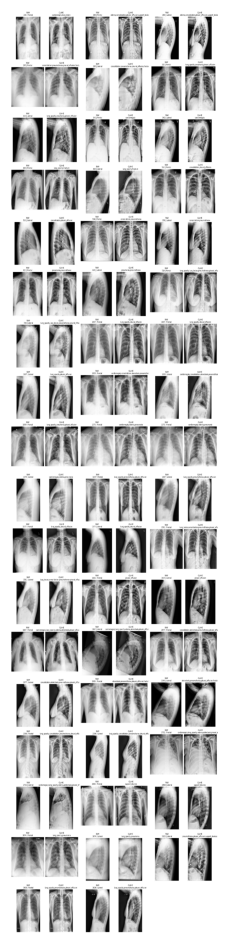

In [46]:
cols = 3
thumb_w, thumb_h = 350, 260

rows = int(np.ceil(len(panel_paths) / cols))
collage = np.ones((rows * thumb_h, cols * thumb_w, 3), dtype=np.uint8) * 255

for i, pn in enumerate(panel_paths):
    img = cv2.imread(pn)
    img = cv2.resize(img, (thumb_w, thumb_h))

    r = i // cols
    c = i % cols
    y1, y2 = r * thumb_h, r * thumb_h + thumb_h
    x1, x2 = c * thumb_w, c * thumb_w + thumb_w
    collage[y1:y2, x1:x2] = img

collage_path = os.path.join(OUT_DIR, "sanity_collage_v02.png")
cv2.imwrite(collage_path, collage)

plt.figure(figsize=(12,12))
plt.imshow(cv2.cvtColor(collage, cv2.COLOR_BGR2RGB))
plt.axis("off")


📌 CELL 6 — Per-UID Mini-Grids (Poster Ready)

In [48]:
for uid in df["UID"].unique():
    sub = df[df["UID"] == uid]

    # Always get a 2D axes array (n_rows x 2)
    fig, axes = plt.subplots(
        nrows=len(sub),
        ncols=2,
        figsize=(8, 3 * len(sub)),
        squeeze=False  # <-- this is the key
    )

    for i, (_, row) in enumerate(sub.iterrows()):
        img_path = os.path.join(IMG_DIR, row["Image_ID"])

        try:
            raw, clahe = load_raw_and_clahe(img_path)
        except FileNotFoundError:
            print(f"[WARN] Missing image for UID {uid}: {img_path}")
            continue

        ax_raw = axes[i, 0]
        ax_clahe = axes[i, 1]

        ax_raw.imshow(raw, cmap="gray")
        ax_raw.set_title(f"{row['Image_ID']} | RAW\n{row['View']}")
        ax_raw.axis("off")

        ax_clahe.imshow(clahe, cmap="gray")
        ax_clahe.set_title(f"CLAHE\n{row['Pathology_Labels_14']}")
        ax_clahe.axis("off")

    plt.tight_layout()
    out_uid = os.path.join(OUT_DIR, f"uid_{uid}_grid.png")
    plt.savefig(out_uid, dpi=150)
    plt.close()

📌 CELL 7 — Sample Set Table (20–40 Images)

In [49]:
sample_table = df.copy()
sample_table["short_caption"] = sample_table["caption"].str.slice(0, 120)

sample_table["selection_reason"] = (
    "Non-normal IU-CXR; pathology present; panel suitability"
)

sample_path = os.path.join(OUT_DIR, "sanity_sample_table.csv")
sample_table.to_csv(sample_path, index=False)

sample_table.head(10)

,UID,Image_ID,View,MeSH,Problems,image,indication,comparison,findings,impression,caption,Pathology_Labels_14,report_word_count,report_sentence_count,short_caption,selection_reason
0,206,206_IM-0697-6001.dcm.png,Frontal,Density/lung/lingula;Cardiomegaly/borderline;A...,Density;Cardiomegaly;Aorta;Arthritis;Nodule,"PA and lateral chest XXXX, XXXX at XXXX hours....","XXXX on XXXX, increasing pain.",NaN,Chest Comparison: There is a 2.6 cm diameter ...,Chest. 1. Left lower lobe nodule which is worr...,"XXXX on XXXX, increasing pain. Chest Compariso...","cardiomegaly,lung_lesion",235,33,"XXXX on XXXX, increasing pain. Chest Compariso...",Non-normal IU-CXR; pathology present; panel su...
1,289,289_IM-1292-0001-0001.dcm.png,Frontal,"Catheters, Indwelling;Medical Device","Catheters, Indwelling;Medical Device",Xray Chest PA and Lateral,"XXXX-year-old female, infection, XXXX",NaN,"Heart size within normal limits, stable medias...",No acute findings,"XXXX-year-old female, infection, XXXX. Heart s...","edema,consolidation,pleural_effusion,support_d...",43,6,"XXXX-year-old female, infection, XXXX. Heart s...",Non-normal IU-CXR; pathology present; panel su...
2,289,289_IM-1292-0001-0002.dcm.png,Lateral,"Catheters, Indwelling;Medical Device","Catheters, Indwelling;Medical Device",Xray Chest PA and Lateral,"XXXX-year-old female, infection, XXXX",NaN,"Heart size within normal limits, stable medias...",No acute findings,"XXXX-year-old female, infection, XXXX. Heart s...","edema,consolidation,pleural_effusion,support_d...",43,6,"XXXX-year-old female, infection, XXXX. Heart s...",Non-normal IU-CXR; pathology present; panel su...
3,295,295_IM-1348-1001.dcm.png,Frontal,"Fractures, Bone/clavicle/left/healed","Fractures, Bone","PA and lateral chest x-XXXX dated XXXX, XXXX a...","XXXX-year-old XXXX, EtOH abuse.",None.,Limited lateral projection. The lungs are clea...,No acute cardiopulmonary abnormality.,"XXXX-year-old XXXX, EtOH abuse. Limited latera...","consolidation,pneumothorax,pleural_effusion,fr...",46,8,"XXXX-year-old XXXX, EtOH abuse. Limited latera...",Non-normal IU-CXR; pathology present; panel su...
4,295,295_IM-1348-2001.dcm.png,Lateral,"Fractures, Bone/clavicle/left/healed","Fractures, Bone","PA and lateral chest x-XXXX dated XXXX, XXXX a...","XXXX-year-old XXXX, EtOH abuse.",None.,Limited lateral projection. The lungs are clea...,No acute cardiopulmonary abnormality.,"XXXX-year-old XXXX, EtOH abuse. Limited latera...","consolidation,pneumothorax,pleural_effusion,fr...",46,8,"XXXX-year-old XXXX, EtOH abuse. Limited latera...",Non-normal IU-CXR; pathology present; panel su...
5,332,332_IM-1588-1001.dcm.png,Frontal,Opacity/lung/lower lobe/left/streaky;Opacity/r...,Opacity;Opacity,Xray Chest PA and Lateral,"XXXX, XXXX x1 XXXX. Concern for left lower lob...",None available.,There are are streaky retrocardiac left lower ...,"Streaky left retrocardiac airspace opacities, ...","XXXX, XXXX x1 XXXX. Concern for left lower lob...","lung_opacity,pneumonia,pleural_effusion",61,6,"XXXX, XXXX x1 XXXX. Concern for left lower lob...",Non-normal IU-CXR; pathology present; panel su...
6,332,332_IM-1588-2001.dcm.png,Lateral,Opacity/lung/lower lobe/left/streaky;Opacity/r...,Opacity;Opacity,Xray Chest PA and Lateral,"XXXX, XXXX x1 XXXX. Concern for left lower lob...",None available.,There are are streaky retrocardiac left lower ...,"Streaky left retrocardiac airspace opacities, ...","XXXX, XXXX x1 XXXX. Concern for left lower lob...","lung_opacity,pneumonia,pleural_effusion",61,6,"XXXX, XXXX x1 XXXX. Concern for left lower lob...",Non-normal IU-CXR; pathology present; panel su...
7,342,342_IM-1655-0001-0001.dcm.png,Frontal,Cardiomegaly/mild;Calcified Granuloma/lung/upp...,"Cardiomegaly;Calcified Granuloma;Aorta, Thoracic",2 views Chest: XXXX,Preoperative renal transplant.,Chest x-XXXX of XXXX.,The lungs and pleural spaces show no acute abn...,1. No acute pulmonary findings. 2. Mild cardio...,Preoperative renal transplant. The lungs and p...,cardiomegaly,43,9,P